#Image classification

Creating an image classifier for the Cifar10 dataset using tensorflow and keras.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import sys
sys.path.insert(0,"/content/gdrive/MyDrive/data_science_projects/data_science_projects_2022/cifar10_image_classification/modules/")

In [3]:
from import_data import get_data, get_train_test_data, normalise_data
from create_pipeline import create_pipeline

In [28]:
%load_ext autoreload
%autoreload 2

from import_data import get_data, get_train_test_data, normalise_data
from create_pipeline import create_pipeline
from image_classification_model import create_model

from tensorflow.keras.layers import Conv2D, Dense, Input
from tensorflow import keras


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
def main ():
    raw_data = get_data ()

    Xy_data = get_train_test_data (raw_data)

    Xy_data_normalised = normalise_data (Xy_data)

    return Xy_data_normalised

In [31]:
def main2 ():
    from tensorflow.keras.datasets import cifar10
    data_model = create_pipeline ([
                                   get_data, 
                                   get_train_test_data, 
                                   normalise_data, 
                                   create_model (
                                       input_layer = Input (shape = (32, 32, 3)), 
                                       hidden_layers = [Dense (64, activation = "relu"), 
                                                        Dense (64, activation = "relu"), 
                                                        Dense (10)
                                                        ]
                                                 )
                                   ])   #   This is a function
                                   #   Not sure if this is the best way to do 
                                   #   this. Maybe it would be better to create 
                                   #   the model and then add the returned 
                                   #   function to the pipeline.


    data_n_model = data_model (cifar10)   #   initializing function


    return data_n_model

In [32]:
main2 ()._fields

('data_raw', 'data_normalised', 'model')

In [33]:
test_data = main2 ()

In [34]:
test_data.model.summary ()

Model: "cifar10_first_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 dense_10 (Dense)            (None, 32, 32, 64)        256       
                                                                 
 dense_11 (Dense)            (None, 32, 32, 64)        4160      
                                                                 
 dense_12 (Dense)            (None, 32, 32, 10)        650       
                                                                 
Total params: 5,066
Trainable params: 5,066
Non-trainable params: 0
_________________________________________________________________


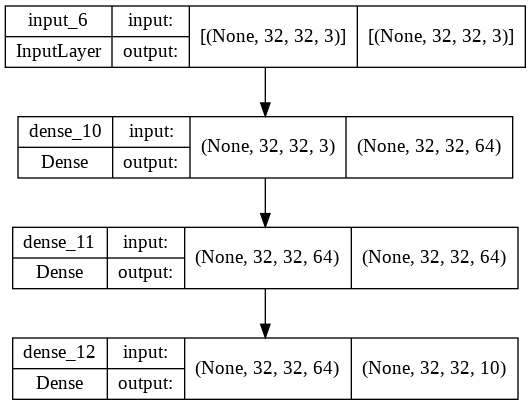

In [35]:
keras.utils.plot_model (test_data.model, show_shapes = True)

In [38]:
display (test_data._fields,
         test_data.data_raw._fields,
         test_data.data_normalised._fields)

('data_raw', 'data_normalised', 'model')

('X_train', 'y_train', 'X_test', 'y_test')

('X_train_norm', 'y_train', 'X_test_norm', 'y_test')

In [6]:
test_model = create_model (input_layer = Input (shape = (32, 32, 3)), hidden_layers = 
                           [Dense (64, activation = "relu"), 
                           Dense (64, activation = "relu"), 
                           Dense (10)])

In [8]:
data_model = test_model (test_data)

In [10]:
data_model.model.summary ()

Model: "cifar10_first_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 dense (Dense)               (None, 32, 32, 64)        256       
                                                                 
 dense_1 (Dense)             (None, 32, 32, 64)        4160      
                                                                 
 dense_2 (Dense)             (None, 32, 32, 10)        650       
                                                                 
Total params: 5,066
Trainable params: 5,066
Non-trainable params: 0
_________________________________________________________________


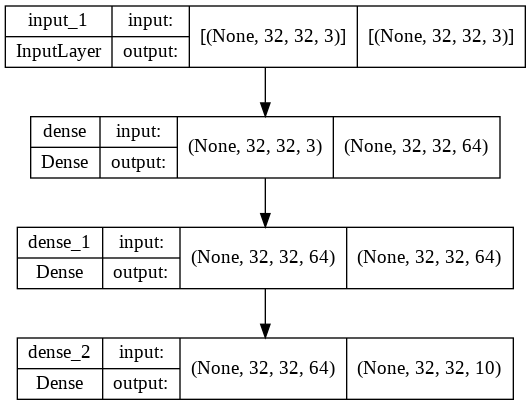

In [30]:
keras.utils.plot_model (data_model.model, show_shapes = True)